#Le jeu de la vie 

Importation des fonctions que l'on utlisiera:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
from matplotlib.animation import FuncAnimation
from IPython.display import Image
from utils import calcul_nb_voisins
from utils import iteration_jeu


##Questions préliminaires:

Création de la chaine de caractères filename:

In [2]:
filename='hmma238_tp_selenaiskounen.ipynb'


Création de la variable taille_str:

In [3]:
taille_str=len(filename)
print(len(filename))

31


Création de la variable ma_graine:

In [4]:
ma_graine=taille_str//6
print(ma_graine)

5


##Implémentation sans numpy:

Définition de la fonction calcul_nb_voisins qui permet de calculer le nombre de cellule voisines de la cellule:

In [5]:
def calcul_nb_voisins(Z):
    forme = len(Z) , len(Z[0])
    N= [[0,]*(forme[0]) for i in range(forme[1])]
    for x in range(1,forme[0]-1):
       for y in range(1,forme[1]-1):
           N[x][y]=Z[x-1][y-1] + Z[x][y-1]+ Z[x+1][y-1] + Z[x-1][y] + 0  + Z[x+1][y] + Z[x-1][y+1] + Z[x][y+1] + Z[x+1][y+1]
    return N

Affichage de la liste Z, pour cela nous aurons besoin d'importer matplotlib.pyplot:

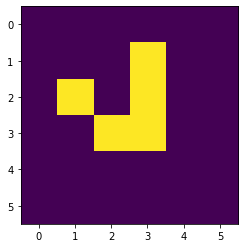

In [6]:
import matplotlib.pyplot as plt
from matplotlib import animation 
Z=[[0,0,0,0,0,0],
   [0,0,0,1,0,0],
   [0,1,0,1,0,0],
   [0,0,1,1,0,0],
   [0,0,0,0,0,0],
   [0,0,0,0,0,0]]
plt.imshow(Z)

Application de la fonction calcul_nb_voisins à la liste Z:

In [7]:
Z=[[0,0,0,0,0,0],
   [0,0,0,1,0,0],
   [0,1,0,1,0,0],
   [0,0,1,1,0,0],
   [0,0,0,0,0,0],
   [0,0,0,0,0,0]]
print(calcul_nb_voisins(Z))

[[0, 0, 0, 0, 0, 0], [0, 1, 3, 1, 2, 0], [0, 1, 5, 3, 3, 0], [0, 2, 3, 2, 2, 0], [0, 1, 2, 2, 1, 0], [0, 0, 0, 0, 0, 0]]


Definition de la fonction iteration_jeu qui permet de calculer le nombre de cellules voisines à la génération suivante:

In [8]:
def iteration_jeu(Z):
    forme=len(Z),len(Z[0])
    N=calcul_nb_voisins(Z)
    for x in range(1,forme[0]-1):
        for y in range(1,forme[1]-1):
            if Z[x][y]==1 and(N[x][y]<2 or N[x][y]>3):
                Z[x][y]=0 #mort de la cellule à la génération suivante par isolement ou par etoufement
            elif Z[x][y]==0 and N[x][y]==3:
                Z[x][y]=1 #naissance de la cellule à la génération suivante
    return Z

Application de la fonction iteration_jeu à la liste Z:

In [9]:
iteration_jeu(Z)


[[0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 1, 0],
 [0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0]]

Definition d'une fonction qui permettera d'afficher les étapes pour 10 itérations.Pour la définition de cette focntion on utilisera une boucle for ainsi que la fonction imshow du package matplotlib afin d'afficher les sorties:

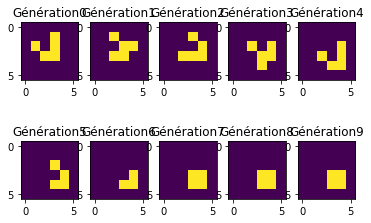

In [10]:
Z = [[0,0,0,0,0,0],
    [0,0,0,1,0,0],
    [0,1,0,1,0,0],
    [0,0,1,1,0,0],
    [0,0,0,0,0,0],
    [0,0,0,0,0,0]]
import  matplotlib.pyplot as plt
import numpy as np

for i in range (10):
        plt.subplot(2,5,i+1)
        Z=np.array(Z)
        plt.imshow(Z)
        Z=iteration_jeu(Z)
        plt.title("Génération" + str(i))


Les sorties obtenues indiquent bien que de l'itération 0 à 4, le nombre de cellules voisines à la génération suivante est différent.Cependant, la figure obtenue à la génération 4 est identique à celle de la génération 0 décallée d'une case vers le bas et une case vers la droite. Tandis qu'à partir de l'itération 7 ce nombre est constant en effet le schéma est stable à partir de cette itération. On peut donc conclure qu'à partir de la génération 7 il n'y a plus de naissance de nouvelle cellule ni de mort.

##Implémentation avec numpy:

In [11]:
import numpy as np
vect = np.array([0,1,0,0,1,1])
nb_vect = np.zeros(vect.shape)
nb_vect[1:-1] += (vect[:-2] + vect[2:])

print(vect)
print(nb_vect)

[0 1 0 0 1 1]
[0. 0. 1. 1. 1. 0.]


Defini comme suit, nb_vect signifie que l'on ne s'interesse pas au bord du vecteur mais uniquement à ce qui ce passe entre le deuxième et l'avant dernier élément de ce vecteur.

Definition de la fonction calcul_nb_voisins_np:

In [12]:
def calcul_nb_voisins_np(Z):
    Z=np.array(Z)
    nb_voisins_np=np.zeros(Z.shape)
    nb_voisins_np[1:-1,1:-1] +=Z[1:-1,:-2] + Z[:-2,:-2]+ Z[:-2,2:] + Z[2:,2:] + Z[2:,:-2] + Z[1:-1,2:] + Z[:-2,1:-1] + Z[2:,1:-1]
    return(nb_voisins_np)

Dans ce cas la fonction calcul_nb_voisins_np permet de calculer uniquement le nombre de voisins de chacune des cellules de la matrice de départs sans prendre celles qui sont sur les bords de la matrice. On obtiendra donc en sortie, pour une matrice Z, des zeros sur les bords et des nombres differents de 0 entre la deuxieme et l'avant derniere colone et la deuxieme et l'avant derniere ligne.

Application de la fonction calcul_nb_voisins_np à la matrice Z:

In [13]:
Z = [[0,0,0,0,0,0],
    [0,0,0,1,0,0],
    [0,1,0,1,0,0],
    [0,0,1,1,0,0],
    [0,0,0,0,0,0],
    [0,0,0,0,0,0]]

print(calcul_nb_voisins_np(Z))

[[0. 0. 0. 0. 0. 0.]
 [0. 1. 3. 1. 2. 0.]
 [0. 1. 5. 3. 3. 0.]
 [0. 2. 3. 2. 2. 0.]
 [0. 1. 2. 2. 1. 0.]
 [0. 0. 0. 0. 0. 0.]]


On remarque que le résultat obtenu est identique à celui obtenu sans numpy.

Définition de la fonction  iteration_jeu_np:

In [14]:
def iteration_jeu_np(Z):
    Z=np.array(Z)# on reprend le même code que précédement avec comme Z une matrice
    forme=Z.shape 
    N=calcul_nb_voisins_np(Z) # le nombre de cellule voisines défini précédement pour Z array
    for x in range(1,forme[0]-1):
        for y in range(1,forme[1]-1):
            if Z[x][y]==1 and(N[x][y]<2 or N[x][y]>3):
                Z[x][y]=0 
            elif Z[x][y]==0 and N[x][y]==3:
                Z[x][y]=1 
    return Z

Application de la fonction iteration_jeu_np à Z:

In [15]:
print(iteration_jeu_np(Z))

[[0 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 1 0]
 [0 0 1 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


On obtient bien le même résultat que lors de l'implémentation sans numpy.

Définition de la fonction jeu_np:

In [16]:
def jeu_np(Z_in,nb_iter):
    for i in range (10):
        Z_in=iteration_jeu_np(Z_in)
    return(Z_in)
        

Application de la fonction jeu_np à Z_in=Z et nb_iter=7:

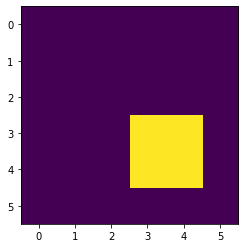

In [17]:
Z=[[0,0,0,0,0,0],
   [0,0,0,1,0,0],
   [0,1,0,1,0,0],
   [0,0,1,1,0,0],
   [0,0,0,0,0,0],
   [0,0,0,0,0,0]]
plt.imshow(jeu_np(Z,7))

On retrouve bien l'itération 7 obtenue lors de l'implémentation sans numpy.

Affichage du film qui représente les itérations du jeu de la vie pour la matrice Z_huge:

In [18]:
Z_huge = np.zeros((100, 100))
Z_np = np.array(
[[0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0],
[0, 1, 0, 1, 0, 0],
[0, 0, 1, 1, 0, 0],
[0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0]])
Z_huge[10:16, 10:16] = Z_np

Définition d'une fonction animate qui permettera l'affichage du film représentant les itérations du jeu:

ANIMATION,!!!!!!

Initialisation avec une matrice aléatoire de taille 100 * 100 :

In [18]:
import numpy.random as rd
prop_active=(1+ma_graine)*10/100
np=prop_active
Z_b=rd.binomial(1,0.6,(100,100)) #ici n=1 et donc p=0.6 (car prop_active=0.6)
print(prop_active)
Z_f=Z_b[1:-1, 1:-1]



0.6


ANIMATION!!!!!

Affichage de 10 itérations de trois matrices simples représentant des jeux stables:

Première matrice (Le bloc):

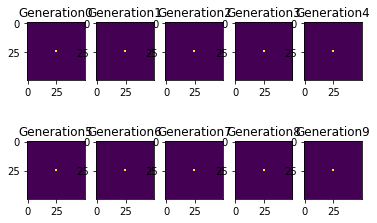

In [26]:
import matplotlib.pyplot as plt
import numpy as np
M1 = np.zeros((50, 50))
M1[25,25] = M1[25, 24] = M1[24, 25] = M1[24,24]  = 1

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(iteration_jeu_np(M1))
    plt.title("Generation" + str(i))

Deuxième matrice(Le pain):

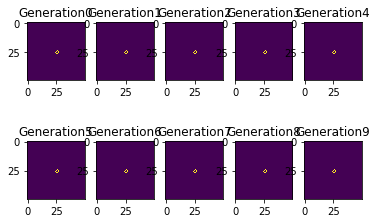

In [27]:
import matplotlib.pyplot as plt
import numpy as np
M2 = np.zeros((50,50))
M2[26,24] = M2[25,25] = M2[24,26] = M2[25,27] = M2[26,27] = M2[27, 26] = M2[27,25] = 1

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(iteration_jeu_np(M2))
    plt.title("Generation" + str(i))

Troisième matrice (Le bateau):

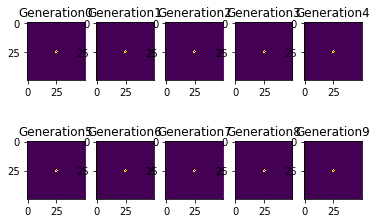

In [28]:
import matplotlib.pyplot as plt
import numpy as np
M3 = np.zeros((50,50))
M3[25,24] = M3[26,24] = M3[26,25] = M3[25,26] = M3[24,25] = 1

for i in range (10):
    plt.subplot(2,5,i+1)
    plt.imshow(iteration_jeu_np(M3))
    plt.title("Generation"+str(i))

Affichage d'une matrice représentant un jeu oscillant de période 2(Le crapeau):

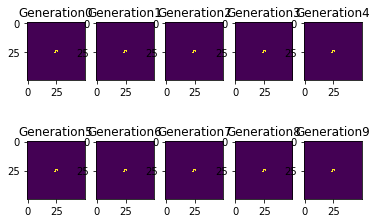

In [29]:
import matplotlib.pyplot as plt
import numpy as np
M = np.zeros((50,50))
M[24,25] = M[25,25] = M[25,26] = M[25,24]=M[26,24]=M[27,24]=1

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(iteration_jeu_np(M))
    plt.title("Generation" + str(i))

Création du jeu sous forme de la classe JeuDeLaVie. Pour cela, on utilisera comme moyen de stockage un tenseur tridimensionnel.

In [42]:
import matplotlib.pyplot as plt
import numpy as np
class JeuDeLaVie:

    def __init__(self, init_state, _time_T):
        self.init_state = init_state
        self._time_T = _time_T
        self._dimension = (n_1, n_2) = init_state.shape
        self._historic_state = np.zeros((n_1, n_2, _time_T+1))
        self._historic_state[:, :, 0] = self.init_state
        self.average_life = np.zeros((n_1, n_2))

    def play(self):
        t = 1
        while (t <= self._time_T):
            self._historic_state[:, :, t] = iteration_jeu_np(
                self._historic_state[:, :, t-1])
            self.average_life = np.mean(self._historic_state, axis=(2))
            t = t + 1

    def plot(self):
        plt.imshow(self.average_life)
        



Application pour la matrice Z et 20 répétition:

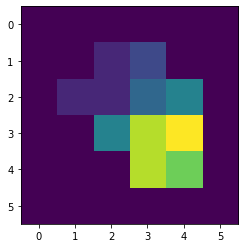

In [43]:
from matplotlib import animation
from IPython.display import Image
jeu=JeuDeLaVie(np.array(Z),10)
jeu.play()
jeu.plot()